# COVID en la CDMX

## Casos de COVID, personas hospitalizadas y capacidad de hospitales

### Carlos Eduardo Peña Muñoz - A00826254

In [1]:
#pip install xlrd

In [2]:
#pip install openpyxl

In [3]:
#pip install pandas

In [4]:
#pip install numpy

In [5]:
#pip install matplotlib

In [6]:
#pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%ls presentacion

capacidadhospitalaria.csv  casospositivos.csv  personashospitalizadas.csv


### Base de Datos casospositivos.csv

In [9]:
df = pd.read_csv('presentacion/casospositivos.csv')
df.head()

,fecha_toma_muestra,pruebas_totales,positivos_totales,pruebas_totales_cdmx,positivos_totales_cdmx,tasa_positividad,tasa_positividad_cdmx
0,2020-03-05,69,1,52,1,0.014493,0.019231
1,2020-03-13,57,2,46,1,0.035088,0.021739
2,2020-03-19,67,3,67,3,0.044776,0.044776
3,2020-03-24,66,1,60,1,0.015152,0.016667
4,2020-03-26,54,1,50,1,0.018519,0.020000


In [10]:
df.drop(['pruebas_totales','tasa_positividad','pruebas_totales',],
        axis = 1,
        inplace = True)
df.columns

Index(['fecha_toma_muestra', 'positivos_totales', 'pruebas_totales_cdmx',
       'positivos_totales_cdmx', 'tasa_positividad_cdmx'],
      dtype='object')

In [11]:
df.rename(columns = {'pruebas_totales_cdmx' : 'Pruebas Totales',
                     'positivos_totales_cdmx' : 'Positivos Totales',
                     'fecha_toma_muestra' : 'Fecha',
                     'tasa_positividad_cdmx' : 'Tasa de Positividad',},
          inplace = True
         )

### Estadistica de pruebas positivas en la CDMX

In [12]:
df.head()

,Fecha,positivos_totales,Pruebas Totales,Positivos Totales,Tasa de Positividad
0,2020-03-05,1,52,1,0.019231
1,2020-03-13,2,46,1,0.021739
2,2020-03-19,3,67,3,0.044776
3,2020-03-24,1,60,1,0.016667
4,2020-03-26,1,50,1,0.020000


### ¿Cual ha sido la tasa de positividad cada dia desde el año 2020 hasta el 2022?

In [13]:
myPivot = pd.pivot_table(df,
                         index = 'Fecha',
                         values = 'Tasa de Positividad',
                        )
myPivot

,Tasa de Positividad
Fecha,
2020-03-05,0.019231
2020-03-13,0.021739
2020-03-19,0.044776
2020-03-24,0.016667
2020-03-26,0.020000
...,...
2022-02-24,0.255975
2022-02-25,0.268429
2022-02-26,0.244261


### Representación grafica de la tasa de positividad en pruebas de COVID realizadas

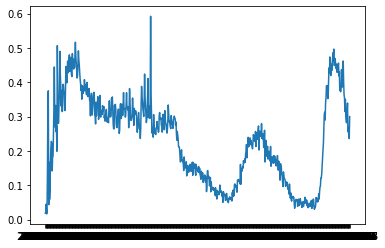

In [14]:
x = myPivot

plt.plot(x)

### Base de datos personashospitalizadas.csv

In [15]:
df = pd.read_csv('presentacion/personashospitalizadas.csv')
df.head()

,fecha,año,mes,dia,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex
0,2020-03-24,2020,marzo,24,50,50,0,39,39,0
1,2020-03-25,2020,marzo,25,105,105,0,33,33,0
2,2020-03-26,2020,marzo,26,128,128,0,42,42,0
3,2020-03-27,2020,marzo,27,175,175,0,60,60,0
4,2020-03-28,2020,marzo,28,257,257,0,78,78,0


In [16]:
df.drop(['hospitalizados_totales','camas_intubados_totales','camas_intubados_edomex','hospitalizados_totales_edomex','año','mes','dia',],
        axis = 1,
        inplace = True)
df.columns

Index(['fecha', 'hospitalizados_totales_cdmx', 'camas_intubados_cdmx'], dtype='object')

In [17]:
df.rename(columns = {'fecha' : 'Fecha',
                     'hospitalizados_totales_cdmx' : 'Hospitalizados Totales',
                     'camas_intubados_cdmx' : 'Intubados',},
          inplace = True
         )

### Cantidad de personas hospitalizadas que necesitaron intubación.

In [18]:
df.head()

,Fecha,Hospitalizados Totales,Intubados
0,2020-03-24,50,39
1,2020-03-25,105,33
2,2020-03-26,128,42
3,2020-03-27,175,60
4,2020-03-28,257,78


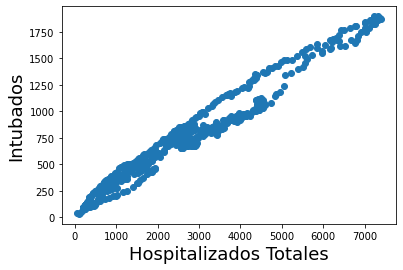

In [19]:
x = df["Hospitalizados Totales"]
y = df["Intubados"]
plt.scatter(x,y)
plt.xlabel('Hospitalizados Totales',fontsize=18)
plt.ylabel('Intubados',fontsize=18)
plt.show()

### Base de datos capacidadhospitalaria.csv

In [20]:
df = pd.read_csv('presentacion/capacidadhospitalaria.csv')
df.head()

,Fecha,Nombre_hospital,Institucion,Estatus_capacidad_hospitalaria,Estatus_capacidad_UCI,Coordenadas
0,2020-06-13,HOSPITAL GENERAL DE ZONA C/MF 29 (S. JUAN ARAGÓN),IMSS,Media,Buena,"19.465117,-99.085162"
1,2020-06-13,HOSPITAL GENERAL DE ZONA 47 (CDMX SUR) (IZP),IMSS,Media,Buena,"19.357566,-99.054269"
2,2020-06-13,UNIDAD MÓVIL TEMPORAL COVID,IMSS,Crítica,Media,"19.403082,-99.089177"
3,2020-06-13,HOSPITAL GENERAL REGIONAL 72,IMSS,Media,Media,"19.356913,-98.990929"
4,2020-06-13,HOSPITAL GENERAL REGIONAL 196,IMSS,Crítica,Media,"19.515133,-98.891450"


In [21]:
df.drop(['Institucion','Estatus_capacidad_UCI','Coordenadas',],
        axis = 1,
        inplace = True)
df.columns

Index(['Fecha', 'Nombre_hospital', 'Estatus_capacidad_hospitalaria'], dtype='object')

In [22]:
df.rename(columns = {'Nombre_hospital' : 'Nombre Hospital',
                     'Estatus_capacidad_hospitalaria' : 'Estatus Capacidad Hospitalaria',},
          inplace = True
         )

### Cúal fué la capacidad de cada hospital de la ciudad por fecha?

In [23]:
df.head()

,Fecha,Nombre Hospital,Estatus Capacidad Hospitalaria
0,2020-06-13,HOSPITAL GENERAL DE ZONA C/MF 29 (S. JUAN ARAGÓN),Media
1,2020-06-13,HOSPITAL GENERAL DE ZONA 47 (CDMX SUR) (IZP),Media
2,2020-06-13,UNIDAD MÓVIL TEMPORAL COVID,Crítica
3,2020-06-13,HOSPITAL GENERAL REGIONAL 72,Media
4,2020-06-13,HOSPITAL GENERAL REGIONAL 196,Crítica
